In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_curve, roc_auc_score)
from matplotlib import pyplot as plt

data = pd.read_csv("train.csv")
data

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5


In [28]:
data.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


##### Analysis Before Cleaning

<AxesSubplot:>

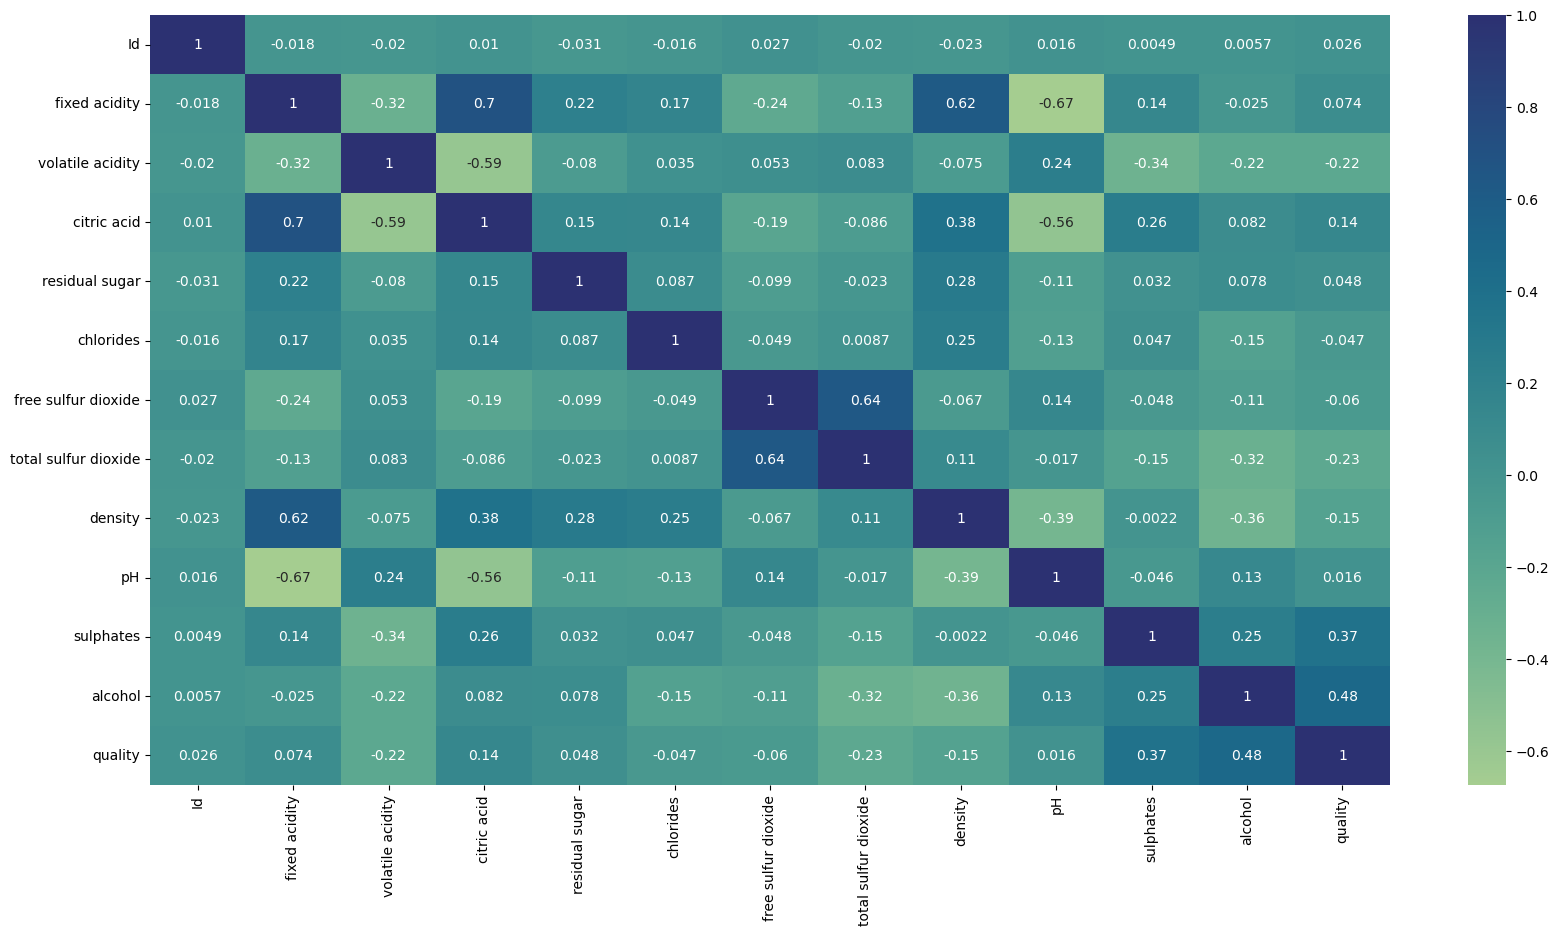

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), cmap="crest", annot=True, ax=ax)

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Read the data into a pandas dataframe
df_train = pd.read_csv('train.csv')

# Create a scaler object
scaler = MinMaxScaler()

# Select the columns to be scaled
cols_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Apply the scaler to the selected columns
df_train[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Print the normalized data
print(df_train)

        Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0       0.275229          0.228571     0.513158        0.078125   
1        1       0.394495          0.085714     0.960526        0.085938   
2        2       0.192661          0.235714     0.039474        0.070312   
3        3       0.284404          0.492857     0.289474        0.109375   
4        4       0.321101          0.128571     0.394737        0.085938   
...    ...            ...               ...          ...             ...   
2051  2051       0.146789          0.092857     0.171053        0.062500   
2052  2052       0.431193          0.292857     0.276316        0.046875   
2053  2053       0.247706          0.178571     0.552632        0.039062   
2054  2054       0.376147          0.228571     0.000000        0.042969   
2055  2055       0.110092          0.092857     0.236842        0.085938   

      chlorides  free sulfur dioxide  total sulfur dioxide   density  \
0      0.151741

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Read the data into a pandas dataframe
df_train = pd.read_csv('train.csv')

# Create a scaler object
scaler = MinMaxScaler()

# Select the columns to be scaled
cols_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Apply the scaler to the selected columns
# df_train[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Print the normalized data
print(df_train)

        Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            8.0              0.50         0.39            2.20   
1        1            9.3              0.30         0.73            2.30   
2        2            7.1              0.51         0.03            2.10   
3        3            8.1              0.87         0.22            2.60   
4        4            8.5              0.36         0.30            2.30   
...    ...            ...               ...          ...             ...   
2051  2051            6.6              0.31         0.13            2.00   
2052  2052            9.7              0.59         0.21            1.80   
2053  2053            7.7              0.43         0.42            1.70   
2054  2054            9.1              0.50         0.00            1.75   
2055  2055            6.2              0.31         0.18            2.30   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

<AxesSubplot:>

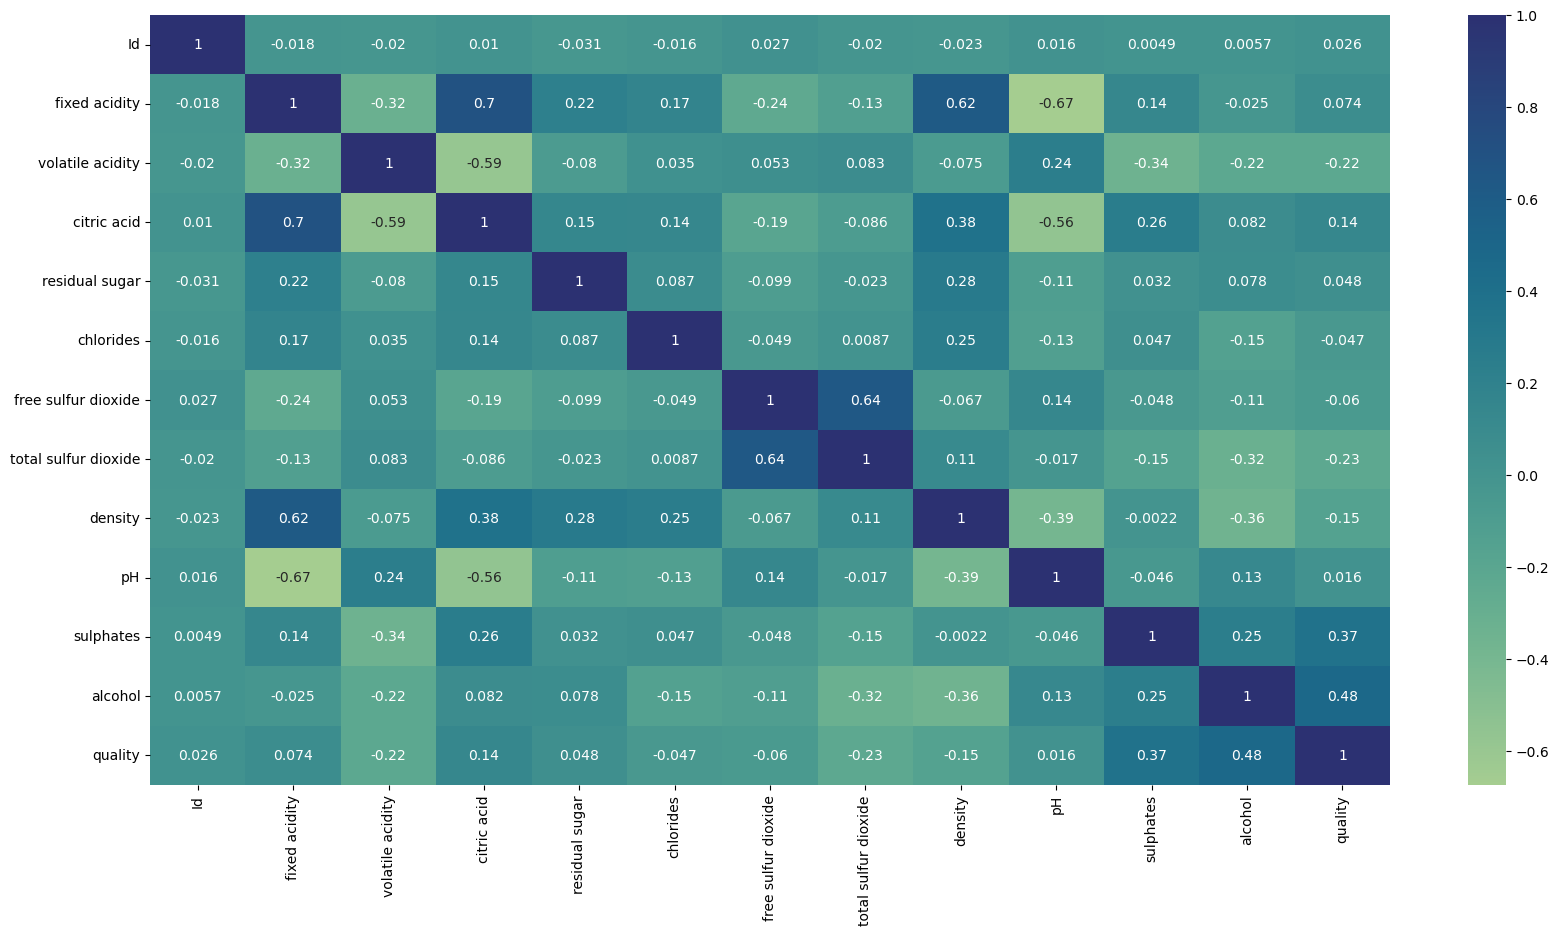

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_train.corr(), cmap="crest", annot=True, ax=ax)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_train[cols_to_scale], df_train["quality"], test_size=0.2, random_state=42)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=11)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the quality of wine in the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4684466019417476


c:\Users\Rames\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
